<a href="https://colab.research.google.com/github/yonydev/LLM-Workshop/blob/main/2_NLP_from_scratch_LLM_Webinar_Notebook_Dec2023.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-header&utm_campaign=2023-10-LLMWebinar"><center><img src="https://drive.google.com/uc?export=view&id=1-lt6Uft8lgBG9jPD0dO6w3dAcv_EUQRP"></center></a>

## Learn natural language processing. From A to Z. From zero to hero. Fast.

Copyright, NLP from scratch, 2023.

[nlpfromscratch.com](https://www.nlpfromscratch.com)

------------

# Webinar #2 - What the Heck is an LLM?

## Introduction 🎬
In this notebook, we will see several different applications of Large Language Models (LLMs), and show how they can be leveraged the open source libraries from [Hugging Face](https://huggingface.co/).

This notebook is best run in [Google Colab](https://colab.research.google.com/), where the majority of dependencies are already installed. However, if you wish to run the notebook locally, please follow the [directions for setting up a local environment](https://drive.google.com/file/d/1EV1seK-dUHRCzj2EDuu3ETAhUyjzOGRd/view?usp=drive_link) and you may then download the notebook as a `.ipynb` and run in either Jupyter or Jupyterlab.

Though Google Colab comes with many useful data science libraries included by default (including Pytorch), the Hugging Face libraries are not, so we will first install those here using `pip`, as they will be used in the remainder of the notebook.

- The `transformers` library, for general usage of transformer models
- The `datasets` library, for working with datasets hosted on Hugging Face
- The `diffusers` library, for working with diffusion models for image generation
- The `accelerate` library, for using GPU for inference

In [1]:
!pip install transformers datasets diffusers accelerate

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 521.2/521.2 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 12.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 265.7/265.7 kB 14.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.3/115.3 kB 14.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 17.7 MB/s eta 0:00:00


## Generating Text: Working with GPT ✍

One of the most well-known transformer models for text generation is that of the Generative Pre-trained Transformer ([GPT](https://en.wikipedia.org/wiki/Generative_pre-trained_transformer)) family of models, made famous by [OpenAI](https://openai.com/).

The first GPT model was released in 2018 and subsequent models, GPT-2 and GPT-3 released in 2019 and 2020, each larger in the number of parameters from the proceeding by a factor of ~10x. GPT-3 was the precursor to InstructGPT, from which OpenAI created the immensely popular and disruptive ChatGPT. GPT-4 was released in March of 2023 and has around 1.8T parameters and represents the current state-of-the-art in LLMs.

The model weights for GPT-3 onward have not been released and are proprietary, but those for GPT-2 are publicly available. Due to computational constraints (even with GPU), here we will work with a much smaller GPT-2 model of only ~124M parameters.

With only a few lines of code, we can download the model from the Hugging Face platform, instantiate it in a [pipeline](https://huggingface.co/docs/transformers/main_classes/pipelines), and then generate text based on an input string:

In [ ]:
from transformers import pipeline

# Input string to generate from
input_string = "The rain in Spain falls mainly in the plain, and furthermore"

# Create the pipeline for text generation, specify device=0 to use GPU / CUDA
generator = pipeline('text-generation', model='gpt2', device=0)

# Create 3 output generations
outputs = generator(input_string, max_length=40, num_return_sequences=3)

# Display the first output
print(outputs)

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

Setting `pad_token_id` to `eos_token_id`:50256 for open-end generation.


[{'generated_text': 'The rain in Spain falls mainly in the plain, and furthermore that the water in the valley is extremely variable, in relation to the humidity, although it is not to be imagined that the humidity in the'}, {'generated_text': 'The rain in Spain falls mainly in the plain, and furthermore, the rivers tend to flow out of the rivers. The rainy season lasts for at least a week. But it is quite cold as here'}, {'generated_text': "The rain in Spain falls mainly in the plain, and furthermore in the countryside and in the centre of towns. This makes it very hard for them to get the food they need, and they're stuck"}]


In [ ]:
f"{generator.model.num_parameters():,}"

'124,439,808'

We can see that even though this is the smallest GPT-2 model available on Hugging Face, it still weighs in at just over half a gigabyte. The full GPT-2 model, [GPT2-XL](https://huggingface.co/gpt2-xl) is ~6.5 GB!

Now that we've generated some text, let's use the `Markdown` class from IPython to generate the outputs as markdown and display in-line in the notebook:

In [ ]:
# Display the outputs nicely
from IPython.display import Markdown

for output in outputs:
  display(Markdown(output['generated_text']))

The rain in Spain falls mainly in the plain, and furthermore that the water in the valley is extremely variable, in relation to the humidity, although it is not to be imagined that the humidity in the

The rain in Spain falls mainly in the plain, and furthermore, the rivers tend to flow out of the rivers. The rainy season lasts for at least a week. But it is quite cold as here

The rain in Spain falls mainly in the plain, and furthermore in the countryside and in the centre of towns. This makes it very hard for them to get the food they need, and they're stuck

## Stable Diffusion and Generating Synthetic Images 🎨

We can also programmatically generate synthetic media using multimodal NLP and the power of Large Language Models (LLMs). [Stable Diffusion](https://en.wikipedia.org/wiki/Stable_Diffusion) is a very popular series of text-to-image models for this purpose which was released publicly by [Stability AI](https://stability.ai/) in August of 2022. Stable Diffusion is not a transformer architecture (and so some would say is not technically an LLM), though there are other cutting-edge image generation models based on the transformer architecture such as OpenAI's [DALL-E](https://openai.com/dall-e-2).

Stable Diffusion can be used through managed services such as [Clipdrop](https://clipdrop.co/stable-diffusion), which was used to generate the image below:

![image.png](https://drive.google.com/uc?export-download&id=1VTxqGbB_7qJLSlYZb71u7CFEG48uIKuG)

It is also available through a Hugging Face space here: https://huggingface.co/spaces/google/sdxl

Alternatively, if we are more interested in programmatically generating content as part of an application, we can use stable diffusion as part of the Hugging Face [diffusers](https://huggingface.co/docs/diffusers) library, as the model is publicly available. Here, we will use the original [Stable Diffusion 1.4 model](https://huggingface.co/CompVis/stable-diffusion-v1-4):

In [ ]:
from diffusers import StableDiffusionPipeline
import torch

# WARNING: If you are running this locally, this is a large download! (~7 GB)
pipe = StableDiffusionPipeline.from_pretrained("CompVis/stable-diffusion-v1-4", torch_dtype=torch.float16)

# Use GPU
pipe.to("cuda")

# Create the image from a prompt
prompt = "A cute dog in a fuzzy sweater"
image = pipe(prompt).images[0]

# Save the image locally
image.save("image.png")

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["id2label"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["bos_token_id"]` will be overriden.
`text_config_dict` is provided which will be used to initialize `CLIPTextConfig`. The value `text_config["eos_token_id"]` will be overriden.


  0%|          | 0/50 [00:00<?, ?it/s]

Now we can display the image using the code below:

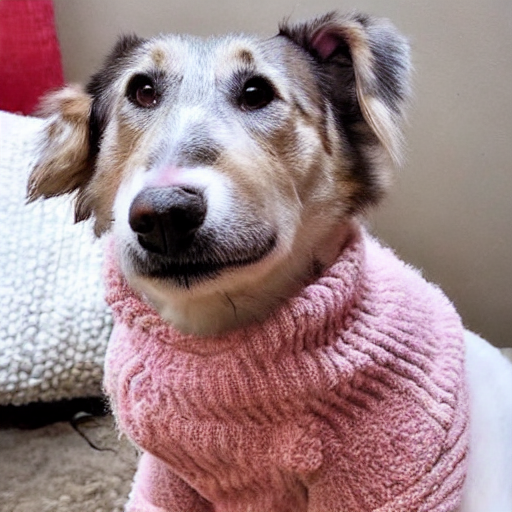

In [ ]:
import cv2
from google.colab.patches import cv2_imshow

img = cv2.imread('image.png')

cv2_imshow(img)

### Whisper and Automatic Speech Recognition (ASR) 🗣

Another area of multimodal NLP is that of transcribing audio. This is known historically as text-to-speech, but in the domain of machine learning is usually referred to as an automatic speech recognition (ASR) task.

OpenAI has developed its proprietary [Whisper model](https://openai.com/research/whisper), which, while making available to call through APIs, has also released the model weights and code publicly, and so can also be freely used through Hugging Face by downloading the model and using the associated [wrapper classes](https://huggingface.co/docs/transformers/model_doc/whisper).

The Whisper model is quite complex, combining many different speech recognition tasks ( multilingual speech recognition, speech translation, spoken language identification, and voice activity detection) into a single model, however in simple terms it takes audio, transforms this into image data of spectrograms, and then uses these to predict the output tokens of the transcription.

Here, we will need some audio data to work with, so we will use that which Hugging Face provides in the "Hello World" example for Whisper, samples of audio from [Librispeech ASR corpus](http://www.openslr.org/12).

First, we will import `datasets` and load the sample dataset of audio from Hugging Face:

In [ ]:
from datasets import load_dataset

# load dataset and read audio files
ds = load_dataset("hf-internal-testing/librispeech_asr_dummy", "clean", split="validation")

Extracting data files:   0%|          | 0/1 [00:00<?, ?it/s]

Generating validation split: 0 examples [00:00, ? examples/s]

Let's take a look at a single "observation" of data, which here is a single audio clip. We can see it is actually a [FLAC](https://en.wikipedia.org/wiki/FLAC) file that has been downloaded locally, as well as an associated array of numbers, and a sampling rate:

In [ ]:
# Sample observation - first run of this cell may take some time
sample = ds[72]['audio']
display(sample)

{'path': '/root/.cache/huggingface/datasets/downloads/extracted/dfbece23564f422bc5794f3090902cd16d52d86767b746125ebc2ff3ea5f89ef/dev_clean/1272/141231/1272-141231-0032.flac',
 'array': array([ 1.83105469e-03, -2.13623047e-04, -6.10351562e-05, ...,
        -5.79833984e-04, -5.79833984e-04, -7.32421875e-04]),
 'sampling_rate': 16000}

We can play the audio file by displaying it with the `Audio` class from IPython:

In [ ]:
from IPython.display import Audio
Audio(sample['path'])

Now we can pass the audio into the processor and model, and it will transcribe the audio. The Whisper model comes in a variety of sizes, here we are usin [whisper-small](https://huggingface.co/openai/whisper-small) which has 244M parameters, compared with largest version which has ~1.5B.

In [ ]:
from transformers import WhisperProcessor, WhisperForConditionalGeneration

# load model and processor
processor = WhisperProcessor.from_pretrained("openai/whisper-small")
model = WhisperForConditionalGeneration.from_pretrained("openai/whisper-small")

# Process input to generate input features
input_features = processor(sample["array"], sampling_rate=sample["sampling_rate"], return_tensors="pt").input_features

# generate token ids
predicted_ids = model.generate(input_features)

# decode token ids to text
transcription = processor.batch_decode(predicted_ids, skip_special_tokens=True)

preprocessor_config.json:   0%|          | 0.00/185k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/805 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/836k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.48M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/494k [00:00<?, ?B/s]

normalizer.json:   0%|          | 0.00/52.7k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/34.6k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.08k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.97k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/967M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/3.84k [00:00<?, ?B/s]

The transcription has been generated, and now we can display it nicely as markdown:

In [ ]:
display(Markdown(transcription[0]))

 Then the powerful twist that's rest of the side, in and under the guard.

We can see the transcription model is not perfect, if we compare with the original text:

In [ ]:
ds[72]['text']

'THEN THE POWERFUL TWIST THAT THRUST IT ASIDE IN AND UNDER THE GUARD'

As such we would expect better performance from one of the larger model versions. Nonetheless, the model performs well and can quickly transcribe any spoken audio file in [many different languages](https://github.com/openai/whisper#available-models-and-languages).

## Conclusion 🏁

That concludes the webinar for today! I hope you've learned a lot about the large language model landscape and what is possible with the tools available to us today, and only a few lines of code here or there.

I encourage you to further explore in the list of references and resources below, and to check out further opportunities for learning at https://www.nlpfromscratch.com/training.

Thanks for coming!

### References and Further Reading

- *Generative Pre-trained Transformer.* (n.d.). Wikipedia. Retrieved September 22nd, 2023. https://en.wikipedia.org/wiki/Generative_pre-trained_transformer

- Ali, Fawad. (2023, April 11). *GPT-1 to GPT-4: Each of OpenAI's GPT Models Explained and Compared.* MakeUseOf.
https://www.makeuseof.com/gpt-models-explained-and-compared/

- *Stable Diffusion.* (n.d.). Wikipedia. Retrieved September 22nd, 2023. https://en.wikipedia.org/wiki/Stable_Diffusion

- OpenAI. (2022, September 21). *Introducting Whisper.* https://openai.com/research/whisper

----

<table border="0" bgcolor="white">
  <tr></tr>
  <tr>
      <th align="left" style="align:left; vertical-align: bottom;"><p>Copyright NLP from scratch, 2023.</p></th>
      <th aligh="right" width="33%"><a href="https://www.nlpfromscratch.com?utm_source=notebook&utm_medium=nb-footer-img&utm_campaign=2023-10-LLMWebinar"><img src="https://drive.google.com/uc?export=view&id=1-lt6Uft8lgBG9jPD0dO6w3dAcv_EUQRP"></th>
</tr>
</table>